# Informasi Dataset

AWS (Amazon Web Services) merupakan perusahaan penyedia layanan cloud computing terbesar di dunia yang merupakan anak usaha dari Amazon.

Dataset ini merupakan kumpulan data transaksi penjualan AWS pada produk software ke perusahaan lain atau B2B.

Di dalam data ini, terdapat 19 kolom yaitu:
1. Row ID: Nomor kolom per transaksi
2. Order ID: Kode untuk setiap pesanan
3. Order Date: Tanggal pesanan dilakukan
4. Date Key: Representasi Order Date dalam format (YYYYMMDD)
5. Contact Name: Nama orang yang melakukan pemesanan
6. Country: Negara tempat pemesanan dilakukan
7. City: Kota tempat pemesanan dilakukan
8. Region: Wilayah tempat pemesanan dilakukan
9. Subregion: Subwilayah tempat pemesanan dilakukan
10. Customer: Perusahaan yang melakukan pemesanan
11. Customer ID: Kode untuk perusahaan yang melakukan pemesanan
12. Industry: Industri perusahaan
13. Segment: Segment pelanggan (SMB, Strategic, Enterprise, etc.).
14. Product: Nama produk yang dipesan
15. License: Lisensi untuk produk yang dipesan
16. Sales: Total penjualan untuk transaksi tersebut
17. Quantity: Totak barang dalam transaksi
18. Discount: Discount dalam transaksi
19. Profit: Keuntungan dari transaksi

## Problem statement

Berdasarkan dataset ini, maka analisis yang dilakukan adalah mengidentifikasi faktor-faktor utama yang memengaruhi penjualan dan profitabilitas, memahami perbedaan performa antar segmen/region, serta mengevaluasi apakah jumlah lisensi dan produk yang dibeli berdampak signifikan terhadap peningkatan profit.

In [2]:
from google.colab import files
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats

# baca CSV
df_dataset = pd.read_csv('https://raw.githubusercontent.com/vidaaashafy/Capstone-3/refs/heads/main/SaaS-Sales.csv')


In [3]:
# informasi general
df_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Row ID        9994 non-null   int64  
 1   Order ID      9994 non-null   object 
 2   Order Date    9994 non-null   object 
 3   Date Key      9994 non-null   int64  
 4   Contact Name  9994 non-null   object 
 5   Country       9994 non-null   object 
 6   City          9994 non-null   object 
 7   Region        9994 non-null   object 
 8   Subregion     9994 non-null   object 
 9   Customer      9994 non-null   object 
 10  Customer ID   9994 non-null   int64  
 11  Industry      9994 non-null   object 
 12  Segment       9994 non-null   object 
 13  Product       9994 non-null   object 
 14  License       9994 non-null   object 
 15  Sales         9994 non-null   float64
 16  Quantity      9994 non-null   int64  
 17  Discount      9994 non-null   float64
 18  Profit        9994 non-null 

Hasil di atas menunjukkan bahwa tidak ada data yang kosong atau missing value, oleh karena itu handling tidak perlu dilakukan

In [4]:
df_dataset.head(5)

,Row ID,Order ID,Order Date,Date Key,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit
0,1,EMEA-2022-152156,11/9/2022,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,Marketing Suite,16GRM07R1K,261.9600,2,0.00,41.9136
1,2,EMEA-2022-152156,11/9/2022,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,FinanceHub,QLIW57KZUV,731.9400,3,0.00,219.5820
2,3,AMER-2022-138688,6/13/2022,20220613,Deirdre Bailey,United States,New York City,AMER,NAMER,Phillips 66,1056,Energy,Strategic,FinanceHub,JI6BVL70HQ,14.6200,2,0.00,6.8714
3,4,EMEA-2021-108966,10/11/2021,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,ContactMatcher,DE9GJKGD44,957.5775,5,0.45,-383.0310
4,5,EMEA-2021-108966,10/11/2021,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,Marketing Suite - Gold,OIF7NY23WD,22.3680,2,0.20,2.5164


In [5]:
# cek apa saja produk yang dijual
produk = df_dataset['Product'].unique()
print(produk)
print('\n')

# hitung jumlah jenis produk
jumlah_produk = df_dataset['Product'].nunique()
print("Jumlah jenis produk:", jumlah_produk)

['Marketing Suite' 'FinanceHub' 'ContactMatcher' 'Marketing Suite - Gold'
 'SaaS Connector Pack' 'ChatBot Plugin' 'Site Analytics' 'OneView'
 'Support' 'Data Smasher' 'SaaS Connector Pack - Gold' 'Storage'
 'Big Ol Database' 'Alchemy']


Jumlah jenis produk: 14


In [6]:
# cek apa saja perusahaan yang beli
perusahaan = df_dataset['Customer'].unique()
print(perusahaan)
print('\n')

# hitung jumlah jenis produk
jumlah_perusahaan = df_dataset['Customer'].nunique()
print("Jumlah perusahaan:", jumlah_perusahaan)

['Chevron' 'Phillips 66' 'Royal Dutch Shell' 'BNP Paribas' 'Engie'
 'Microsoft' 'Pfizer' 'Toyota Motor' 'Home Depot' 'Wells Fargo'
 'Carrefour' 'Costco Wholesale' 'McKesson' 'Siemens' 'Intel' 'Glencore'
 'Procter & Gamble' 'Banco Santander' 'Pemex' 'Samsung Electronics' 'Sony'
 'Morgan Stanley' 'Bank of America Corp.' 'Tesco' 'Aviva'
 'Mondelez International' 'Abbott Laboratories' 'Fannie Mae' 'Aetna'
 'Oracle' 'Nissan Motor' 'Tyson Foods' 'Verizon Communications' 'Itochu'
 'Daimler' 'Walgreens' 'Boeing' 'Valero Energy' 'Nestle'
 'Philip Morris International' 'Trafigura Group' 'Walmart' 'Cisco Systems'
 'Prudential Financial' 'Amazon' 'Gazprom' 'FedEx' 'Honda Motor'
 'CVS Health' 'General Motors' 'State Farm Insurance Cos.' 'Comcast'
 'AmerisourceBergen' 'Johnson & Johnson' 'HonHai Precision Industry'
 'American Express' 'J.P. Morgan Chase & Co.' 'Kroger' 'Volkswagen'
 'Merck' 'AT&T' 'Allstate' 'BMW' 'Humana' 'Sprint Nextel' 'Allianz'
 'United Parcel Service' 'Target' 'Airbus' 'Cigna' 

In [7]:
# cek apa saja industry yang beli
industri = df_dataset['Industry'].unique()
print(industri)
print('\n')

# hitung jumlah jenis produk
jumlah_industri = df_dataset['Industry'].nunique()
print("Jumlah jenis industri:", jumlah_industri)

['Energy' 'Finance' 'Tech' 'Healthcare' 'Manufacturing' 'Retail'
 'Consumer Products' 'Misc' 'Transportation' 'Communications']


Jumlah jenis industri: 10


## Statistik Deskriptif

In [8]:
# statistik deskriptif per license yang di beli
df_dataset.describe()

,Row ID,Date Key,Customer ID,Sales,Quantity,Discount,Profit
count,9994.000000,9.994000e+03,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,2.021803e+07,1049.771963,229.858001,3.789574,0.156203,28.656896
std,2885.163629,1.123898e+04,29.719388,623.245101,2.225110,0.206452,234.260108
min,1.000000,2.020010e+07,1001.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,2.021052e+07,1024.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,2.022063e+07,1049.000000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,2.023052e+07,1076.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,2.023123e+07,1101.000000,22638.480000,14.000000,0.800000,8399.976000


informasi statistik deskriptif untuk per sold license
1.  Sales
*   avg = 229.8,
*   max = 22638,
*   median = 54.49,
*   min = 0.4

2.  Profit
*   avg = 28.65,
*   max =  8399,
*   median = 8.6,
*   min = -6599

In [9]:
# statistik deskriptif
df_dataset.describe(include='object')

,Order ID,Order Date,Contact Name,Country,City,Region,Subregion,Customer,Industry,Segment,Product,License
count,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994
unique,5009,1237,793,48,262,3,12,99,10,3,14,9994
top,EMEA-2023-100111,9/6/2022,Leonard Kelly,United States,London,EMEA,NAMER,Allianz,Finance,SMB,ContactMatcher,3NTBV9B3PS
freq,14,38,37,2001,922,4219,2507,192,2127,5191,1842,1


Berdasarkan hasil di atas:
1. Terdapat 9994 Order ID, namun dilihat secara distinct, Order ID hanya ada 5009
2. Count distinct dari license 9994, sesuai dengan jumlah baris yaitu 9994


Hal ini menandakan bahwa di dalam 1 Order ID, terdapat beberapa pembelian product. Selain itu, terdapat kemungkinan bahwa dalam 1 Order ID terdapat pembelian product yang sama dengan license yang berbeda


## Cleaning Dataset

In [10]:
# cek duplikat data
print("duplikat_data : ", df_dataset.duplicated().sum())

duplikat_data :  0


In [11]:
# cek missing values
print("missing_values:", df_dataset.isna().sum())

missing_values: Row ID          0
Order ID        0
Order Date      0
Date Key        0
Contact Name    0
Country         0
City            0
Region          0
Subregion       0
Customer        0
Customer ID     0
Industry        0
Segment         0
Product         0
License         0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64


In [12]:
# cari tanggal order terawal & terakhir di dataset
df_dataset['Order Date'] = pd.to_datetime(df_dataset['Order Date'])

min_date = df_dataset['Order Date'].min()
max_date = df_dataset['Order Date'].max()

print("tanggal order paling awal:", min_date)
print("tanggal order paling akhir:", max_date)

tanggal order paling awal: 2020-01-04 00:00:00
tanggal order paling akhir: 2023-12-31 00:00:00


Dataset ini adalah data penjualan SaaS dari tahun januari 2020 hingga desember 2023

## Cek Outlier

CEK OUTLIER DENGAN BOXPLOT

Text(0, 0.5, 'Frequency')

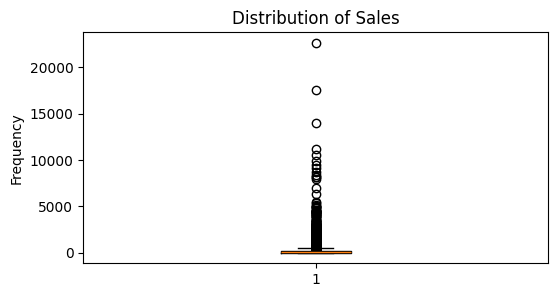

In [13]:
# boxplot sales untuk tau outlier
plt.figure(figsize=(6, 3))
plt.boxplot(df_dataset['Sales'].dropna())
plt.title('Distribution of Sales')
plt.ylabel('Frequency')


Text(0, 0.5, 'Frequency')

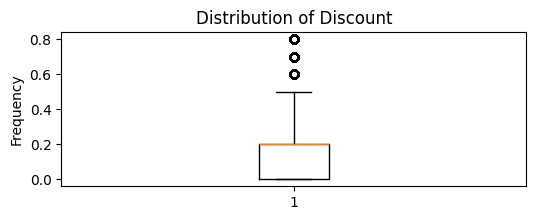

In [14]:
# boxplot discount untuk tau outlier
plt.figure(figsize=(6,2))
plt.boxplot(df_dataset['Discount'].dropna())
plt.title('Distribution of Discount')
plt.ylabel('Frequency')


Text(0, 0.5, 'Frequency')

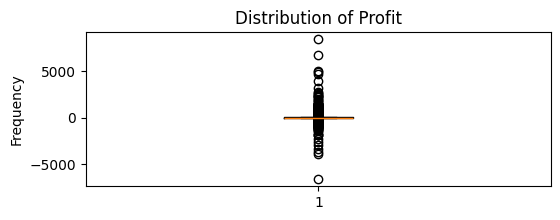

In [15]:
# boxplot profit untuk tau outlier
plt.figure(figsize=(6, 2))
plt.boxplot(df_dataset['Profit'].dropna())
plt.title('Distribution of Profit')
plt.ylabel('Frequency')

Berdasarkan pengecekean outlier menggunakan boxplot, ditemukan bahwa pada kolom Sales, Discount, dan Profit terdapat banyak nilai yang berada jauh di atas / di bawah garis rata-rata. Oleh karena itu, pengecekan outlier dilanjutkan menggunakan metode IQR dan Zscore

CEK OUTLIER DENGAN IQR

In [16]:
# cari outlier berdasarkan IQR
def get_outliers(df, column):
    Q1 = df_dataset[column].quantile(0.25)
    Q3 = df_dataset[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = df_dataset[(df_dataset[column] < lower) | (df_dataset[column] > upper)]
    return outliers

# outlier untuk Sales, Discount, Profit
out_sales = get_outliers(df_dataset, "Sales")
out_discount = get_outliers(df_dataset, "Discount")
out_profit = get_outliers(df_dataset, "Profit")

# cek bagaimana karakteristik outlier
print("Outlier Sales:")
print(out_sales[['Sales','Quantity','Discount','Profit']].describe())

print("\nOutlier Discount:")
print(out_discount[['Sales','Quantity','Discount','Profit']].describe())

print("\nOutlier Profit:")
print(out_profit[['Sales','Quantity','Discount','Profit']].describe())


Outlier Sales:
              Sales     Quantity     Discount       Profit
count   1167.000000  1167.000000  1167.000000  1167.000000
mean    1266.052104     5.158526     0.145587   160.708308
std     1419.107804     2.447331     0.162669   657.523657
min      499.168000     1.000000     0.000000 -6599.978000
25%      631.960000     3.000000     0.000000    10.075550
50%      866.400000     5.000000     0.200000   119.686000
75%     1346.502500     7.000000     0.200000   270.363600
max    22638.480000    14.000000     0.800000  8399.976000

Outlier Discount:
             Sales    Quantity    Discount       Profit
count   856.000000  856.000000  856.000000   856.000000
mean     75.033572    3.912383    0.718925   -89.438144
std     273.151422    2.200061    0.069023   363.283239
min       0.444000    1.000000    0.600000 -6599.978000
25%       4.916250    2.000000    0.700000   -35.169600
50%      12.005000    3.000000    0.700000   -11.656700
75%      34.306000    5.000000    0.800000 

CEK OUTLIER DENGAN Z SCORE

In [17]:
# cari outlier dengan zscore
from scipy.stats import zscore

# rumus hitung z score
df_dataset['Z_Sales'] = zscore(df_dataset['Sales'])
df_dataset['Z_Discount'] = zscore(df_dataset['Discount'])
df_dataset['Z_Profit'] = zscore(df_dataset['Profit'])

# bagi outlier atas dan bawah
def cek_outlier(z):
    if z < -3:
        return "Outlier Bawah"
    elif z > 3:
        return "Outlier Atas"
    else:
        return "Normal"

# cari outlier
df_dataset['Outlier_Sales'] = df_dataset['Z_Sales'].apply(cek_outlier)
df_dataset['Outlier_Discount'] = df_dataset['Z_Discount'].apply(cek_outlier)
df_dataset['Outlier_Profit'] = df_dataset['Z_Profit'].apply(cek_outlier)

# print outlier masing-masing
print("SALES")
print(df_dataset['Outlier_Sales'].value_counts())

print("\nDISCOUNT")
print(df_dataset['Outlier_Discount'].value_counts())

print("\nPROFIT")
print(df_dataset['Outlier_Profit'].value_counts())


SALES
Outlier_Sales
Normal          9867
Outlier Atas     127
Name: count, dtype: int64

DISCOUNT
Outlier_Discount
Normal          9694
Outlier Atas     300
Name: count, dtype: int64

PROFIT
Outlier_Profit
Normal           9887
Outlier Atas       70
Outlier Bawah      37
Name: count, dtype: int64


Berdasarkan pengecekan outlier dengan IQR dan Zscore, ditemukan bahwa pada dataset ini **terdapat perbedaan nilai yang signifikan pada kolom Sales, Discount, dan Profit**. Oleh karena itu, dilakukan pengecekan lebih lanjut untuk mengetahui apakah terdapat perbedaan sales pada satu Order ID yang membeli produk yang sama

## Cek Dataset Berdasarkan Order ID

In [18]:
# cek apakah 1 Order ID punya produk sama dengan harga berbeda
multi_order = (df_dataset.groupby(['Order ID', 'Product','Quantity'])['Sales'].nunique().reset_index())

# filter: produk dalam 1 order yang punya >1 harga unik
price_diff = multi_order[multi_order['Sales'] > 1]

multi_order_2 = multi_order[multi_order['Order ID'].isin(price_diff['Order ID'])]
multi_order_2_sort = multi_order_2.sort_values(by=['Order ID', 'Product'])
multi_order_2_sort['sales/quantity'] = multi_order_2_sort['Sales'] / multi_order_2_sort['Quantity']
multi_order_column = multi_order_2_sort[['Order ID', 'Product', 'Sales', 'Quantity', 'sales/quantity']]
multi_order_column

,Order ID,Product,Sales,Quantity,sales/quantity
18,AMER-2020-101931,ContactMatcher,1,2,0.500000
19,AMER-2020-101931,Marketing Suite,1,6,0.166667
20,AMER-2020-101931,Marketing Suite - Gold,1,5,0.200000
21,AMER-2020-101931,Support,2,2,1.000000
99,AMER-2020-108189,Data Smasher,1,1,1.000000
...,...,...,...,...,...
9669,EMEA-2023-162670,Support,1,2,0.500000
9756,EMEA-2023-167402,ChatBot Plugin,1,6,0.166667
9757,EMEA-2023-167402,Marketing Suite,1,3,0.333333
9758,EMEA-2023-167402,Support,2,5,0.400000


Dari hasil agregasi, ditemukan bahwa terdapat banyak order ID yang membeli produk yang sama dengan license yang berbeda.

Contohnya pada kolom sales dengan Order ID 'EMEA-2023-167402', terdapat penjualan dua product support.


Sedangkan kolom sales dan quantity adalah agregasi dari produk yang di beli

In [19]:
# cek harga min & max per produk
harga_per_produk = df_dataset.groupby('Product')['Sales'].agg(['min','max']).reset_index()
print(harga_per_produk)


                       Product      min        max
0                      Alchemy  299.990  17499.950
1              Big Ol Database   11.560  22638.480
2               ChatBot Plugin    1.344   1113.024
3               ContactMatcher    0.556   9892.740
4                 Data Smasher    0.990   3347.370
5                   FinanceHub    2.088   4416.174
6              Marketing Suite   35.490   4404.900
7       Marketing Suite - Gold    4.464   2934.330
8                      OneView    0.444   2625.120
9          SaaS Connector Pack    1.892   1336.440
10  SaaS Connector Pack - Gold    1.632    604.656
11              Site Analytics    2.970   4548.810
12                     Storage    1.240     93.360
13                     Support    1.744   8187.650


Berdasarkan pengecekan, ditemukan bahwa terdapat perbedaan harga yang signifikan pada perusahaan dalam pembelian produk yang sama dengan License yang berbeda.

Oleh karena itu, analisis lebih lanjut akan menggunakan dataset baru, yaitu mengelompokkan produk berdasarkan Order ID

# Dataset Agregasi

DATASET AGREGASI PER PRODUCT

Dataset awal diubah menjadi per product untuk dilakukan analisis lebih lanjut.

Selanjutnya, granularity data set menjadi

Customer -> Order ID -> Product

In [20]:
# buat dataset baru
dataset_new = (df_dataset.groupby(
    ['Order ID','Order Date',
    'Contact Name', 'Country', 'Region', 'Subregion',
    'Customer', 'Customer ID','Industry', 'Segment', 'Product']).agg(
    total_sales = ('Sales', 'sum'),
    total_profit = ('Profit', 'sum'),
    license_count = ('License', 'nunique'), #buat mengetahui ada berapa license yang dibeli
    distinct_product  = ('Product', 'nunique') #buat mengetahui ada berapa produk yang dibeli
    ).reset_index()
)

# menambahkan beberapa kolom keterangan waktu untuk analisis time series

dataset_new['Order Date'] = pd.to_datetime(dataset_new['Order Date'])
dataset_new['Year'] = dataset_new['Order Date'].dt.year
dataset_new['Month'] = dataset_new['Order Date'].dt.month
dataset_new['Quarter'] = dataset_new['Order Date'].dt.quarter
dataset_new['Year-Month'] = dataset_new['Order Date'].dt.strftime('%Y-%m')
dataset_new['Year-Quarter'] = dataset_new['Order Date'].dt.year.astype(str) + '-' + dataset_new['Order Date'].dt.quarter.astype(str)

dataset_new.head(3)


,Order ID,Order Date,Contact Name,Country,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,total_sales,total_profit,license_count,distinct_product,Year,Month,Quarter,Year-Month,Year-Quarter
0,AMER-2020-100090,2020-07-08,Hannah Sanderson,United States,AMER,NAMER,Verizon Communications,1094,Communications,Strategic,ContactMatcher,699.192,-19.0890,2,1,2020,7,3,2020-07,2020-3
1,AMER-2020-100279,2020-03-10,Luke Davidson,Brazil,AMER,LATAM,Ford Motor,1009,Manufacturing,SMB,Support,22.380,10.7424,1,1,2020,3,1,2020-03,2020-1
2,AMER-2020-100363,2020-04-08,Frank Ball,Chile,AMER,LATAM,Carrefour,1048,Retail,Strategic,Storage,2.368,0.8288,1,1,2020,4,2,2020-04,2020-2


# Analisis Data

## Analisis Sales, License Count, dan Profit

SALES, LICENSE COUNT (LICENSE YANG TERJUAL), DAN PROFIT PER TAHUN

   Year  total_sales  total_license  total_profit
0  2020  484247.4981           1993    49543.9741
1  2021  470532.5090           2102    61618.6037
2  2022  608473.8300           2580    81726.9308
3  2023  733947.0232           3319    93507.5131


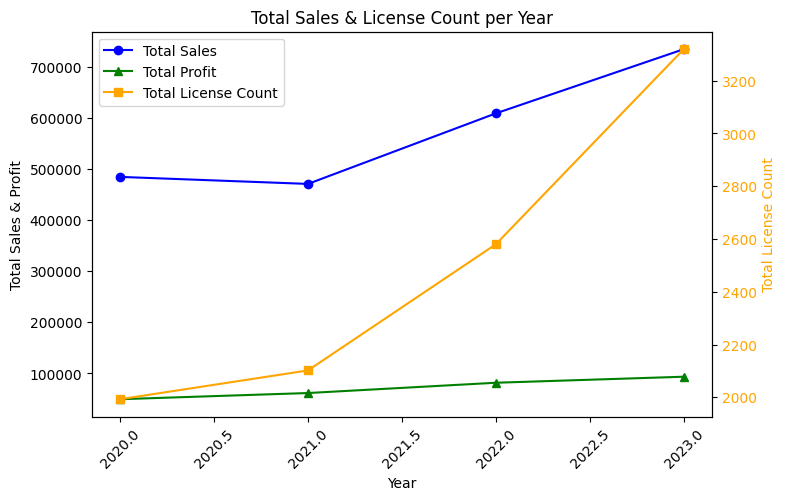

In [21]:
# hitung sales dan license count per tahun
yoy = (dataset_new.groupby('Year', as_index=False).agg(
    total_sales=('total_sales', 'sum'),
    total_license=('license_count', 'sum'),
    total_profit=('total_profit', 'sum')).sort_values('Year')
)

print(yoy)

# grafik gabungan
fig, ax1 = plt.subplots(figsize=(8,5))

# axis sales di sumbu kiri
ax1.plot(yoy['Year'], yoy['total_sales'], marker='o', color='blue', label='Total Sales')
ax1.plot(yoy['Year'], yoy['total_profit'], marker='^', color='green', label='Total Profit')
ax1.set_xlabel('Year')
ax1.set_ylabel('Total Sales & Profit', color='black')
ax1.tick_params(axis='y', labelcolor='black')
ax1.tick_params(axis='x', rotation=45)

# axis license count di sumbu kanan
ax2 = ax1.twinx()
ax2.plot(yoy['Year'], yoy['total_license'], marker='s', color='orange', label='Total License Count')
ax2.set_ylabel('Total License Count', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

# judul grafik
plt.title('Total Sales & License Count per Year')

# legend
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

plt.show()

Grafik menunjukkan license dan sales meningkat tiap tahun meski sales sempat turun di 2021, sementara profit juga naik namun dengan pertumbuhan lebih landai dibandingkan keduanya. Hal ini menunjukkan bahwa meskipun volume penjualan dan pendapatan meningkat pesat, terdapat faktor yang mempengaruhi biaya sehingga margin keuntungan relatif lebih stabil

SALES, LICENSE COUNT (LICENSE YANG TERJUAL), DAN PROFIT PER QUARTER

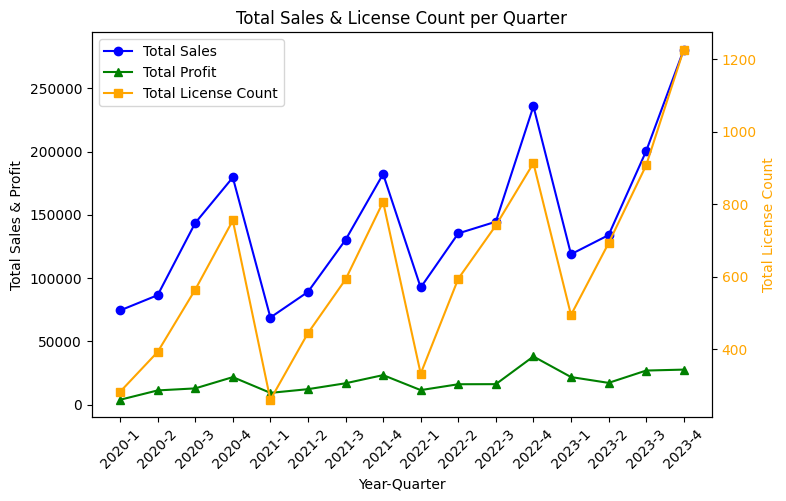

In [22]:
# hitung per Year-Quarter
qoq = (dataset_new.groupby('Year-Quarter', as_index=False).agg(
    total_sales=('total_sales', 'sum'),
    total_license=('license_count', 'sum'),
    total_profit=('total_profit', 'sum')).sort_values('Year-Quarter')
)


# grafik gabungan
fig, ax1 = plt.subplots(figsize=(8,5))

# axis sales di sumbu kiri
ax1.plot(qoq['Year-Quarter'], qoq['total_sales'], marker='o', color='blue', label='Total Sales')
ax1.plot(qoq['Year-Quarter'], qoq['total_profit'], marker='^', color='green', label='Total Profit')
ax1.set_xlabel('Year-Quarter')
ax1.set_ylabel('Total Sales & Profit', color='black')
ax1.tick_params(axis='y', labelcolor='black')
ax1.tick_params(axis='x', rotation=45)  # memiringkan label Quarter

# axis license count di sumbu kanan
ax2 = ax1.twinx()
ax2.plot(qoq['Year-Quarter'], qoq['total_license'], marker='s', color='orange', label='Total License Count')
ax2.set_ylabel('Total License Count', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

# judul grafik
plt.title('Total Sales & License Count per Quarter')

# legend
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

plt.show()


Berdasarkan grafik di atas, baik Sales maupun License yang terjual menunjukkan pola kenaikan dari tahun ke tahun dengan puncak di Q4 tahun 2023. Terlihat juga adanya pola penurunan  yang terjadi di Q1 setiap tahun yang mengindikasikan adanya siklus musiman, yaitu permintaan melemah di awal tahun. Sementara itu, Profit juga meningkat seiring waktu, meski fluktuasinya lebih tajam dan cenderung lebih kecil dibandingkan pertumbuhan Sales dan License.

SALES, LICENSE COUNT, DAN PROFIT BERDASARKAN SEGMENT

      Segment   total_sales  total_license  total_profit
1         SMB  1.161401e+06           5191   134119.2092
2   Strategic  7.061464e+05           3020    91979.1340
0  Enterprise  4.296531e+05           1783    60298.6785


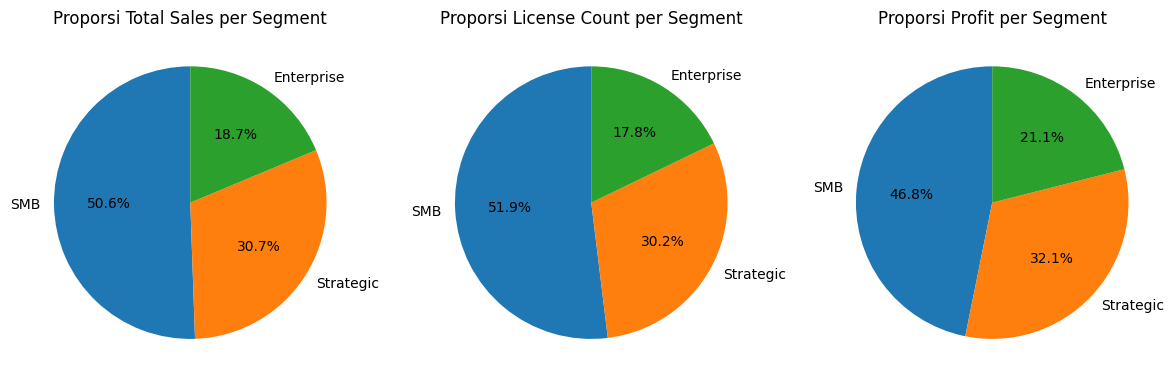

In [23]:
# total sales dan license count per segment
segment_summary = (dataset_new.groupby('Segment', as_index=False).agg(
    total_sales=('total_sales', 'sum'),
    total_license=('license_count', 'sum'),
    total_profit=('total_profit', 'sum')).sort_values('total_sales', ascending=False)
)

print(segment_summary)

fig, axes = plt.subplots(1, 3, figsize=(12,6))

# pie chart sales
axes[0].pie(
    segment_summary['total_sales'],
    labels=segment_summary['Segment'],
    autopct='%1.1f%%',
    startangle=90
)
axes[0].set_title("Proporsi Total Sales per Segment")

# pie chart license count
axes[1].pie(
    segment_summary['total_license'],
    labels=segment_summary['Segment'],
    autopct='%1.1f%%',
    startangle=90
)
axes[1].set_title("Proporsi License Count per Segment")

# pie chart profit
axes[2].pie(
    segment_summary['total_profit'],
    labels=segment_summary['Segment'],
    autopct='%1.1f%%',
    startangle=90
)
axes[2].set_title("Proporsi Profit per Segment")

plt.tight_layout()
plt.show()

Berdasarkan grafik di atas, segmen **SMB** mendominasi baik dari sisi Total Sales (50,6%), penjualan License (51,9%), maupun kontribusi profit (46,8%) diikuti oleh segmen **Strategic** dengan kontribusi sekitar 30%, sementara segmen **Enterprise** menjadi yang paling kecil dengan porsi kurang dari 20%. Hal ini menunjukkan bahwa SMB merupakan pasar utama perusahaan, baik dari segi lisensi yang terjual maupun pendapatan yang dihasilkan.


SALES, LICENSE COUNT, DAN PROFIT BERDASARKAN INDUSTRI

            Industry  total_sales  total_license  total_profit
3            Finance  474150.4844           2127    50348.9696
2             Energy  304644.1409           1316    45282.3137
5      Manufacturing  295192.3812           1222    38413.1064
4         Healthcare  273183.2882           1049    31969.0932
8               Tech  263169.0277           1236    24615.0436
1  Consumer Products  224044.1422           1021    37018.0077
7             Retail  223072.0720            972    30207.8208
0     Communications  120962.2365            593    13976.3410
9     Transportation   90191.3276            351     7402.6967
6               Misc   28591.7596            107     7163.6290


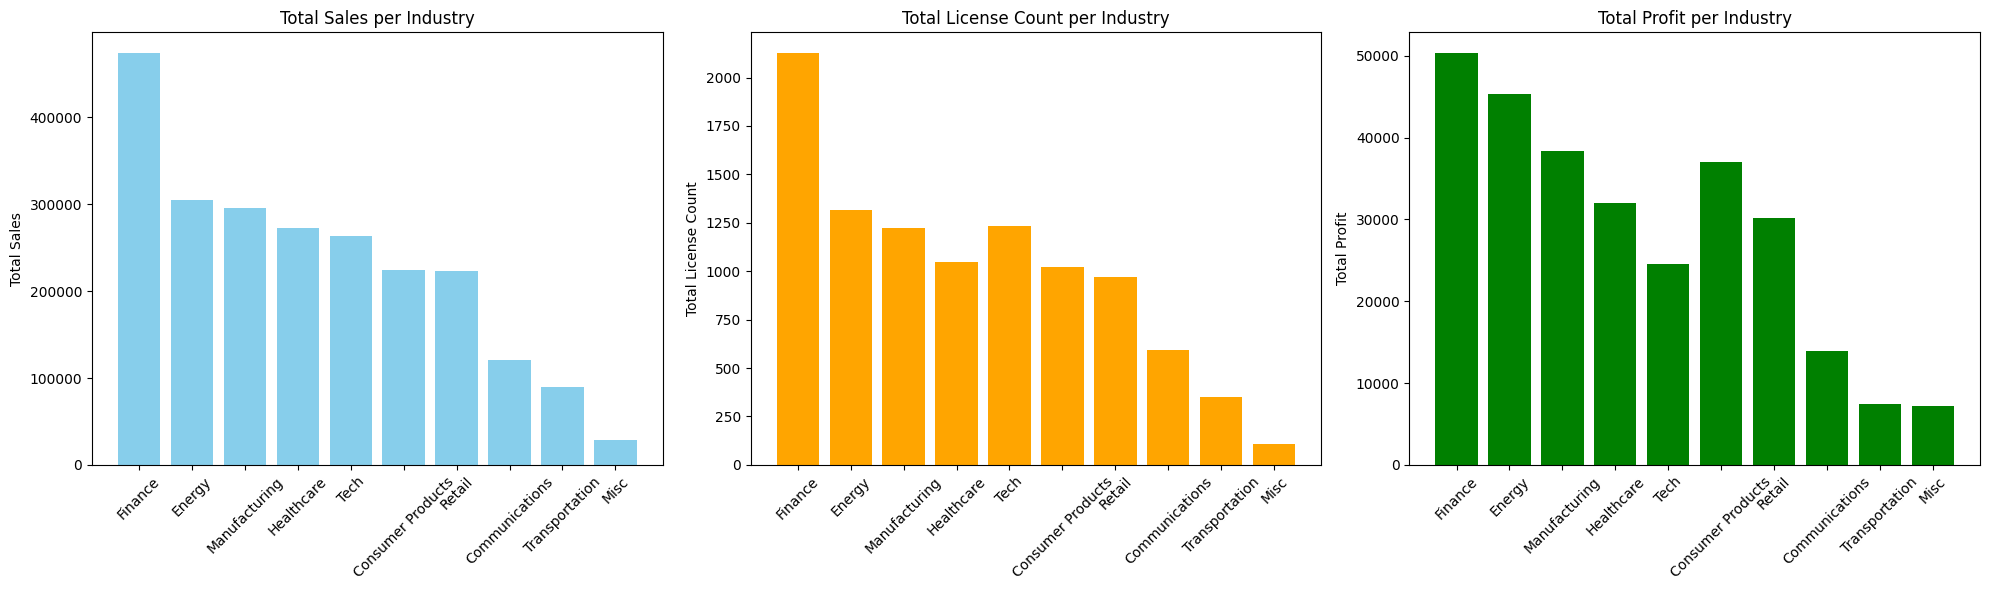

In [24]:
# total sales dan license count per industry
industry_summary = (dataset_new.groupby('Industry', as_index=False).agg(
    total_sales=('total_sales', 'sum'),
    total_license=('license_count', 'sum'),
    total_profit=('total_profit', 'sum')).sort_values('total_sales', ascending=False)
)
print(industry_summary)

fig, axes = plt.subplots(1, 3, figsize=(20,6))

# bar chart sales
axes[0].bar(industry_summary['Industry'], industry_summary['total_sales'], color='skyblue')
axes[0].invert_yaxis
axes[0].set_title("Total Sales per Industry")
axes[0].set_ylabel("Total Sales")
axes[0].tick_params(axis='x', rotation=45)

# bar chart license count
axes[1].bar(industry_summary['Industry'], industry_summary['total_license'], color='orange')
axes[1].set_title("Total License Count per Industry")
axes[1].set_ylabel("Total License Count")
axes[1].tick_params(axis='x', rotation=45)

# bar chart total profit
axes[2].bar(industry_summary['Industry'], industry_summary['total_profit'], color='green')
axes[2].set_title("Total Profit per Industry")
axes[2].set_ylabel("Total Profit")
axes[2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

Grafik di atas menunjukkan bahwa industri Finance menjadi penyumbang terbesar yang cukup signifikan baik dari sisi penjualan License dan Total Sales. Pada industri Energy, penjualan License dan Total Sales tidak sebanyak Finane namun profit yang dihasilkan mampu menyusul. Sementara, industri seperti Communications, Transportations, dan terutama Misc memberikan kontribusi yang jauh lebih kecil. Hal ini menunjukkan bahwa perusahaan masih bertumpu pada sektor Finance sebagai penggerak utama penjualan

SALES, LICENSE COUNT, DAN PROFIT BERDASARKAN REGION

  Region   total_sales  total_license  total_profit
2   EMEA  1.043887e+06           4219   147456.0450
0   AMER  8.378496e+05           3665   127426.9898
1    APJ  4.154642e+05           2110    11513.9869


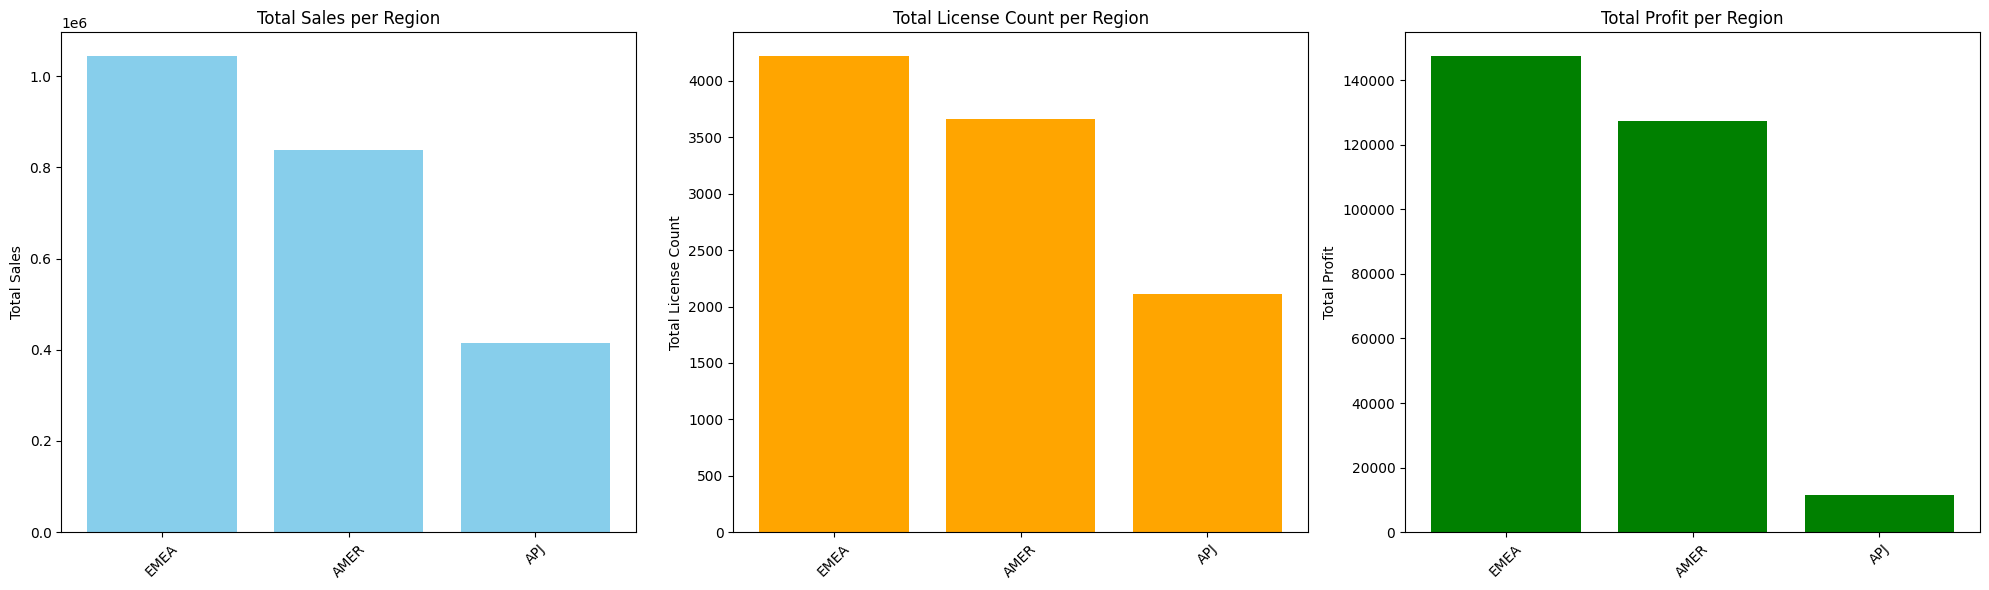

In [25]:
# total sales dan license count per region
region_summary = (dataset_new.groupby('Region', as_index=False).agg(
    total_sales=('total_sales', 'sum'),
    total_license=('license_count', 'sum'),
    total_profit=('total_profit', 'sum')).sort_values('total_sales', ascending=False)
)
print(region_summary)

fig, axes = plt.subplots(1, 3, figsize=(20,6))

# bar chart sales
axes[0].bar(region_summary['Region'], region_summary['total_sales'], color='skyblue')
axes[0].invert_yaxis
axes[0].set_title("Total Sales per Region")
axes[0].set_ylabel("Total Sales")
axes[0].tick_params(axis='x', rotation=45)

# bar chart license count
axes[1].bar(region_summary['Region'], region_summary['total_license'], color='orange')
axes[1].set_title("Total License Count per Region")
axes[1].set_ylabel("Total License Count")
axes[1].tick_params(axis='x', rotation=45)

# bar chart total profit
axes[2].bar(region_summary['Region'], region_summary['total_profit'], color='green')
axes[2].set_title("Total Profit per Region")
axes[2].set_ylabel("Total Profit")
axes[2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

plt.show()

Grafik di atas menunjukkan bahwa EMEA menjadi wilayah dengan kontribusi terbesar baik dalam total sales, penjualan license, maupun kontribusi terhadap profit. Diikuti oleh AMER yang juga cukup tinggi namun masih di bawah EMEA. Sementara itu, APJ tercatat memiliki nilai sales dan license count yang paling rendah dibandingkan dua wilayah lainnya, menandakan potensi pasar yang lebih kecil atau belum tergarap maksimal.

TOTAL SALES, PROFIT, DAN GROSS MARGIN PER QUARTER

    Year  Quarter  total_sales  total_profit  gross_margin
0   2020        1   74447.7960     3811.2290      5.119331
1   2020        2   86538.7596    11204.0692     12.946880
2   2020        3  143633.2123    12804.7218      8.914875
3   2020        4  179627.7302    21723.9541     12.093876
4   2021        1   68851.7386     9264.9416     13.456366
5   2021        2   89124.1870    12190.9224     13.678579
6   2021        3  130259.5752    16853.6194     12.938488
7   2021        4  182297.0082    23309.1203     12.786343
8   2022        1   92596.4190    11446.3415     12.361538
9   2022        2  135370.1130    16084.9055     11.882169
10  2022        3  144614.4282    16153.5046     11.170050
11  2022        4  235892.8698    38042.1792     16.126888
12  2023        1  118895.6174    21772.2303     18.312055
13  2023        2  134023.4058    17165.7570     12.808029
14  2023        3  200433.1730    26913.4451     13.427640
15  2023        4  280594.8270    27656.0807      9.8562

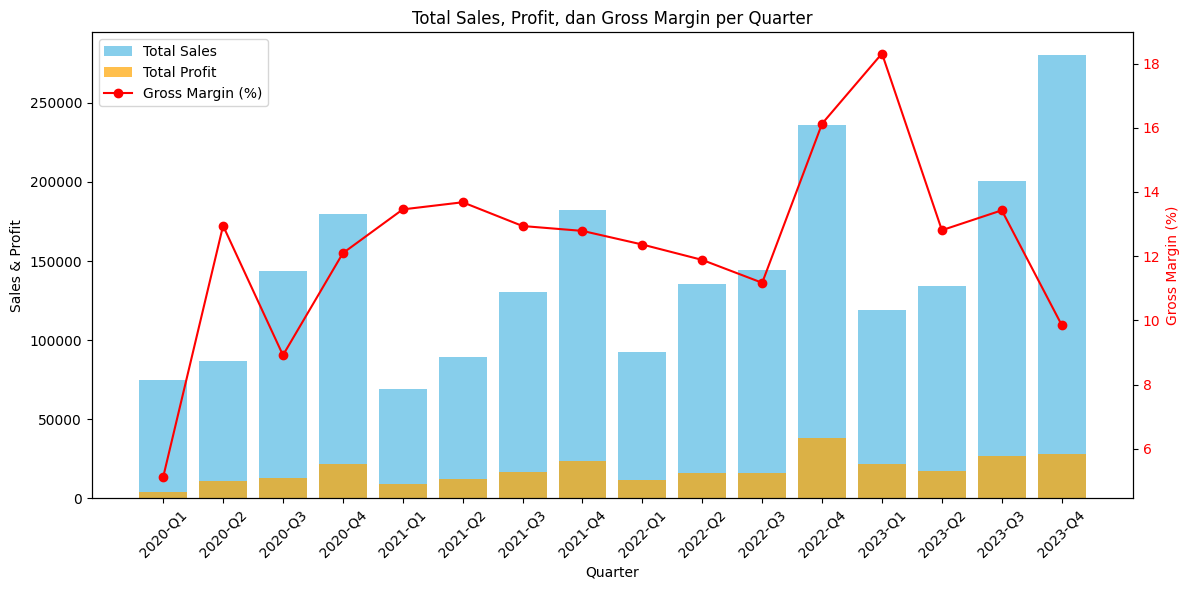

In [26]:
# hitung total sales, profit, dan gross margin per Quarter
quarter_summary = (dataset_new.groupby(['Year','Quarter'], as_index =False).agg(
    total_sales=('total_sales','sum'),
    total_profit=('total_profit','sum')).sort_values(['Year','Quarter'])
)

# tambah kolom gross margin (%)
quarter_summary['gross_margin'] = (quarter_summary['total_profit'] / quarter_summary['total_sales'] * 100)

#quarter dengan Gross Margin terbesar
max_q = quarter_summary.loc[quarter_summary['gross_margin'].idxmax()]

#quarter dengan Gross Margin terkecil
min_q = quarter_summary.loc[quarter_summary['gross_margin'].idxmin()]

print(quarter_summary)
print("\nQuarter dengan Gross Margin terbesar:")
print(max_q)
print("\nQuarter dengan Gross Margin terkecil:")
print(min_q)

# buat label Year-Quarter untuk sumbu X
quarter_summary['Year-Quarter'] = quarter_summary['Year'].astype(str) + "-Q" + quarter_summary['Quarter'].astype(str)

# grafik
fig, ax1 = plt.subplots(figsize=(12,6))

# sales & profit di sumbu kiri (bar chart)
ax1.bar(quarter_summary['Year-Quarter'], quarter_summary['total_sales'], color='skyblue', label='Total Sales')
ax1.bar(quarter_summary['Year-Quarter'], quarter_summary['total_profit'], color='orange', label='Total Profit', alpha=0.7)
ax1.set_xlabel('Quarter')
ax1.set_ylabel('Sales & Profit')
ax1.tick_params(axis='x', rotation=45)

# gross margin di sumbu kanan (line chart)
ax2 = ax1.twinx()
ax2.plot(quarter_summary['Year-Quarter'], quarter_summary['gross_margin'], marker='o', color='red', label='Gross Margin (%)')
ax2.set_ylabel('Gross Margin (%)', color='red')
ax2.tick_params(axis='y', labelcolor='red')

plt.title("Total Sales, Profit, dan Gross Margin per Quarter")

# legend
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

plt.tight_layout()
plt.show()


Grafik memperlihatkan Total Sales cenderung meningkat dari waktu ke waktu dengan puncak tertinggi pada Q4 2023, meskipun sempat mengalami fluktuasi di beberapa periode. otal profit mengikuti pola yang serupa, meski skalanya lebih kecil dibandingkan sales. Sementara itu, gross margin  yang ditunjukkan dengan garis merah tampak berfluktuasi cukup tajam, meningkat pesat pada 2020-Q2, relatif stabil di sepanjang 2021, naik tajam kembali pada 2022-Q4, lalu menurun signifikan hingga 2023-Q4. Hal ini menunjukkan bahwa meskipun penjualan terus tumbuh, profitabilitas tidak selalu konsisten.

TOP DAN BOTTOM 10 CUSTOMER BERDASARKAN SALES DAN PROFIT

Top 10 perusahaan berdasarkan Sales:
                 Customer  total_sales
10                 Anthem   55719.2100
38             Ford Motor   43893.0424
4                 Allianz   42904.1670
16  Bank of America Corp.   41255.9471
92          Valero Energy   41220.4188
55                  Lowes   40360.1630
89            Tyson Foods   40326.3440
5                Allstate   39941.6400
9       AmerisourceBergen   39234.7610
13                    BMW   39083.7900

Top 5 perusahaan berdasarkan Profit:
                  Customer  total_profit
92           Valero Energy    10308.6297
28               Coca-Cola     9449.0246
88         Trafigura Group     8867.8252
62  Mondelez International     8577.6524
55                   Lowes     7937.4915
56                  Lukoil     7117.0922
80                 Siemens     6519.5105
16   Bank of America Corp.     6449.8554
54                  Kroger     6256.1005
10                  Anthem     5953.2038

Bottom 5 perusahaan berdasarkan Sales:
     

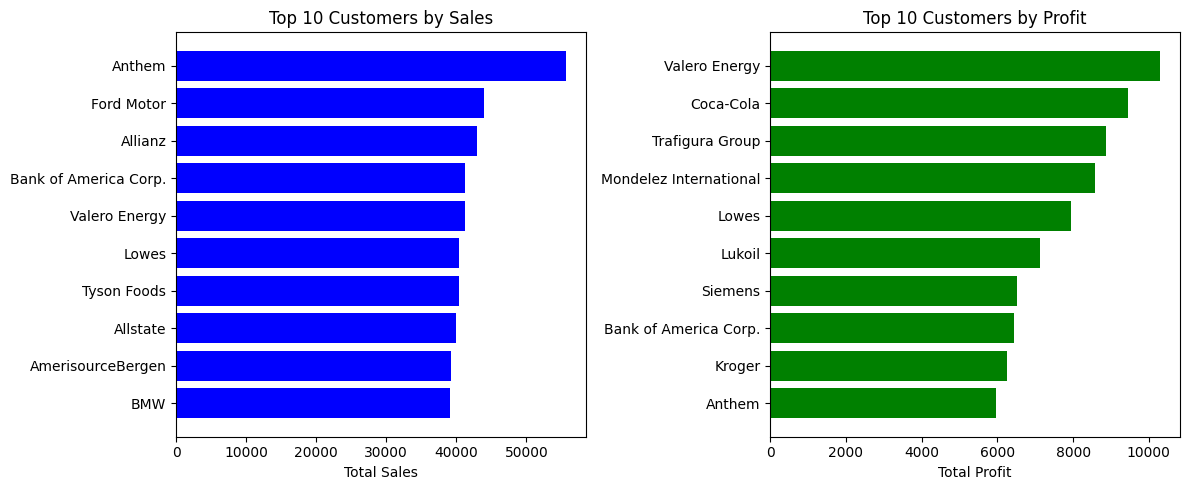

In [27]:
# Hitung total sales dan profit per customer
customer_summary = (dataset_new.groupby('Customer', as_index=False).agg(
    total_sales=('total_sales', 'sum'),
    total_profit=('total_profit', 'sum')
    )
)

# top 10 / tertinggi
top10_sales = customer_summary.nlargest(10, 'total_sales')[['Customer','total_sales']]
top10_profit = customer_summary.nlargest(10, 'total_profit')[['Customer','total_profit']]

# bottom 10 / terendah
bottom10_sales = customer_summary.nsmallest(10, 'total_sales')[['Customer','total_sales']]
bottom10_profit = customer_summary.nsmallest(10, 'total_profit')[['Customer','total_profit']]

print("Top 10 perusahaan berdasarkan Sales:")
print(top10_sales)

print("\nTop 5 perusahaan berdasarkan Profit:")
print(top10_profit)

print("\nBottom 5 perusahaan berdasarkan Sales:")
print(bottom10_sales)

print("\nBottom 5 perusahaan berdasarkan Profit:")
print(bottom10_profit)

# top 5 Sales chart
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.barh(top10_sales['Customer'], top10_sales['total_sales'], color='blue')
plt.title('Top 10 Customers by Sales')
plt.xlabel('Total Sales')
plt.gca().invert_yaxis()  # biar ranking tertinggi di atas

# top 5 Profit chart
plt.subplot(1, 2, 2)
plt.barh(top10_profit['Customer'], top10_profit['total_profit'], color='green')
plt.title('Top 10 Customers by Profit')
plt.xlabel('Total Profit')
plt.gca().invert_yaxis()

plt.tight_layout()
plt.show()


Grafik di atas menunjukkan bahwa meskipun Anthem dan Ford Motor merupakan top perusahaan yang berkontribusi terhadap sales, namun, profit tertinggi justru diberikan dari penjualan kepada Valero Energy dan Coca-cola. Hal ini menunjukkan bahwa tidak semua perusahaan yang memiliki sales tinggi akan berkontribusi terhadap profit tinggi

## Analisis Product

TOP PRODUCT BERDASARKAN SALES, LICENSE COUNT DAN PROFIT

Top produk berdasarkan Quantity:
                       Product  total_license
3               ContactMatcher           1842
13                     Support           1560
5                   FinanceHub            981
9          SaaS Connector Pack            957
11              Site Analytics            889
7       Marketing Suite - Gold            846
2               ChatBot Plugin            796
4                 Data Smasher            775
8                      OneView            466
10  SaaS Connector Pack - Gold            254

Top produk berdasarkan Sales:
                   Product  total_sales
3           ContactMatcher  410378.2650
5               FinanceHub  340935.4150
11          Site Analytics  330007.0540
7   Marketing Suite - Gold  223843.6080
1          Big Ol Database  189238.6310
4             Data Smasher  167380.3180
0                  Alchemy  149528.0300
13                 Support  125152.7440
6          Marketing Suite  114879.9963
8                  OneView  10

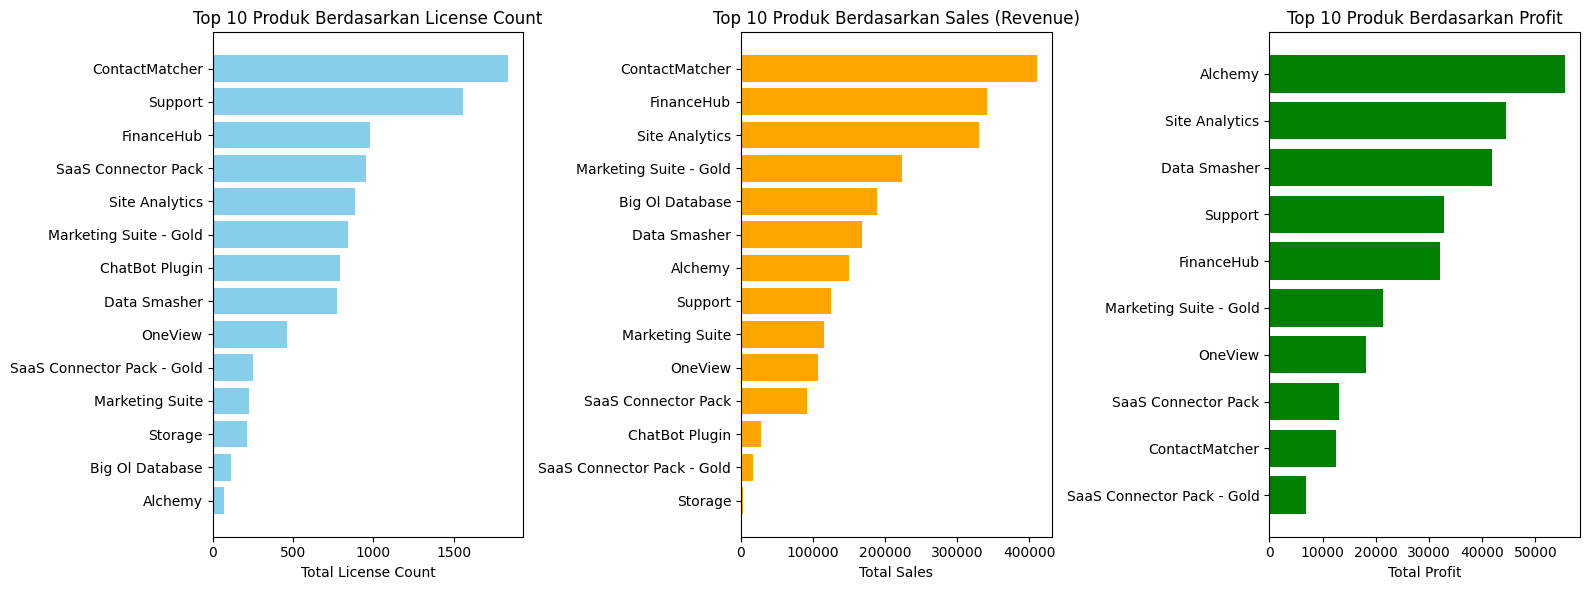

In [28]:
#top produk berdasarkan license count (paling laku unitnya)
top_products_qty = (dataset_new.groupby('Product', as_index=False).agg(
    total_license=('license_count','sum')).sort_values('total_license', ascending=False)
)

print("Top produk berdasarkan Quantity:")
print(top_products_qty.head(10))  #10 produk teratas

#top produk berdasarkan Sales (paling besar revenue)
top_products_sales = (dataset_new.groupby('Product', as_index=False).agg(
    {'total_sales':'sum'}).sort_values('total_sales', ascending=False)
)

print("\nTop produk berdasarkan Sales:")
print(top_products_sales.head(10))

#top produk berdasarkan profit (paling menghasilkan profit)
top_products_profit = (dataset_new.groupby('Product', as_index=False).agg(
    total_profit=('total_profit','sum')).sort_values('total_profit', ascending=False)
)

print("Top produk berdasarkan Profit:")
print(top_products_qty.head(10))

# 2 chart
fig, axes = plt.subplots(1, 3, figsize=(16,6))

# bar chart license count
axes[0].barh(top_products_qty['Product'], top_products_qty['total_license'], color='skyblue')
axes[0].invert_yaxis()  # biar ranking 1 di atas
axes[0].set_title("Top 10 Produk Berdasarkan License Count")
axes[0].set_xlabel("Total License Count")

# bar chart sales
axes[1].barh(top_products_sales['Product'], top_products_sales['total_sales'], color='orange')
axes[1].invert_yaxis()
axes[1].set_title("Top 10 Produk Berdasarkan Sales (Revenue)")
axes[1].set_xlabel("Total Sales")

# bar chart profit
axes[2].barh(top_products_profit['Product'].head(10), top_products_profit['total_profit'].head(10), color='green')
axes[2].invert_yaxis()
axes[2].set_title("Top 10 Produk Berdasarkan Profit")
axes[2].set_xlabel("Total Profit")


plt.tight_layout()
plt.show()

Grafik di atas menunjukkan bahwa ContactMatcher dan Support merupakan produk dengan penjualan License terbanyak sepanjang 3 tahun dari sisi menjadi produk yang berkontribusi terhadap pendapatan. Sementara dari sisi Profit, produk Alchemy menempati posisi tertinggi, diikuti oleh Site Analytics dan Data Smasher, meskipun penjualannya tidak sebanyak ContactMatcher. Hal ini mengindikasikan bahwa produk dengan penjualan terbanyak belum tentu menghasilkan profit tertinggi.

PROFIT MARGIN PER PRODUCT

/tmp/ipython-input-3451348935.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Product', y='profit_margin', data=dataset_new, palette="Set3")


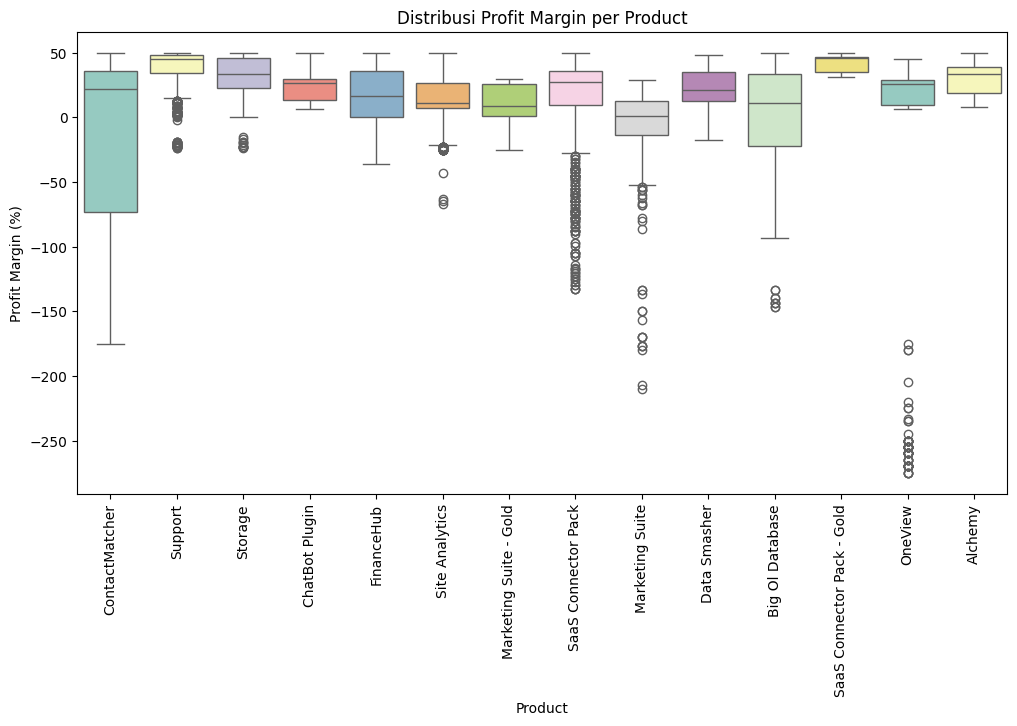

In [29]:
# hitung profit margin per row
dataset_new['profit_margin'] = (dataset_new['total_profit'] / dataset_new['total_sales']) * 100

# groupby per product
profit_margin_product = (dataset_new.groupby('Product').agg(
    total_sales=('total_sales', 'sum'),
    total_profit=('total_profit', 'sum')).reset_index())

# hitung profit margin per product
profit_margin_product['profit_margin (%)'] = (profit_margin_product['total_profit'] / profit_margin_product['total_sales']) * 100

# urutkan dari margin tertinggi ke terendah
profit_margin_product = profit_margin_product.sort_values(by='profit_margin (%)', ascending=False)

profit_margin_product.head()

# boxplot
plt.figure(figsize=(12,6))
sns.boxplot(x='Product', y='profit_margin', data=dataset_new, palette="Set3")
plt.xticks(rotation=90)
plt.title('Distribusi Profit Margin per Product')
plt.xlabel('Product')
plt.ylabel('Profit Margin (%)')
plt.show()

# Uji Statistik

## Analisis Korelasi

KORELASI TOTAL SALES DAN PROFIT

Hipotesis awal : Tidak terdapat hubungan antara sales dan profit

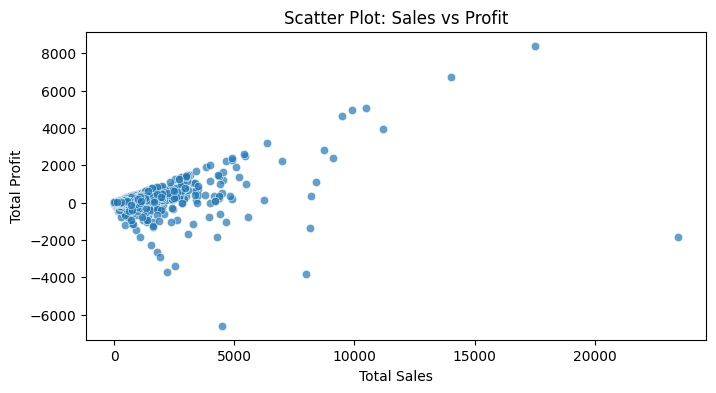

Pearson Correlation: 0.470176835028837
P-value: 0.0
Tolak H0 : Terdapat hubungan signifikan antara Sales dan Profit 


In [30]:
# scatterplot hubungan sales dan profit
plt.figure(figsize=(8,4))
sns.scatterplot(x='total_sales', y='total_profit', data=dataset_new, alpha=0.7)

plt.title('Scatter Plot: Sales vs Profit')
plt.xlabel('Total Sales')
plt.ylabel('Total Profit')
plt.show()

# hitung pearson correlation
from scipy.stats import pearsonr

corr, p_value = pearsonr(dataset_new['total_sales'], dataset_new['total_profit'])

print("Pearson Correlation:", corr)
print("P-value:", p_value)

if p_value < 0.05:
    print("Tolak H0 : Terdapat hubungan signifikan antara Sales dan Profit ")
else:
    print("Terima HO : Tidak terdapat hubungan signifikan antara Sales dan Profit")


H0 : Tidak terdapat hubungan signifikan antara Sales dan Profit

H1 : Terdapat terdapat hubungan signifikan antara Sales dan Profit

Berdasarkan scatterplot, hasil uji nilai pearson correlation (r) 0.47 mendekati 1, dan p-value 0.0 < 0.05 menunjukkan bahwa terdapat hubungan signifikan pada Sales dan Profit. **Maka, H1 diterima**.

Hal ini menunjukkan bahwa semakin tinggi Sales yang dihasilkan perusahaan, maka semakin tinggi Profit yang akan didapatkan

KORELASI PENJUALAN LICENSE DENGAN PROFIT

Hipotesis awal : Tidak terdapat hubungan antara penjualan license dan profit

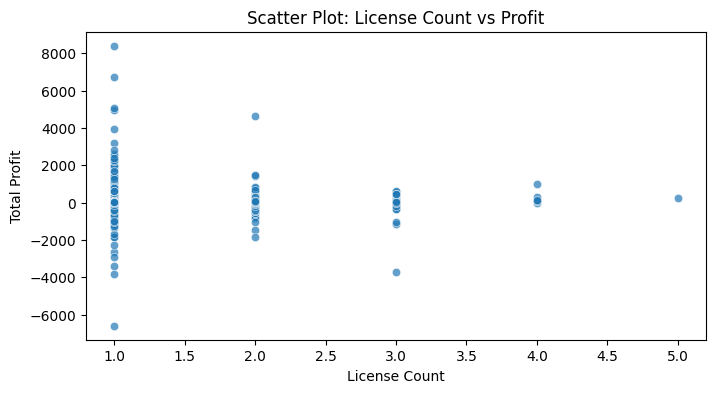

Pearson Correlation: 0.007351742257615614
P-value: 0.4854078166613037
Terima HO : Tidak terdapat hubungan signifikan antara License Count dan Profit


In [31]:
plt.figure(figsize=(8,4))
sns.scatterplot(x='license_count', y='total_profit', data=dataset_new, alpha=0.7)

plt.title('Scatter Plot: License Count vs Profit')
plt.xlabel('License Count')
plt.ylabel('Total Profit')
plt.show()

# hitung pearson correlation
from scipy.stats import pearsonr

corr, p_value = pearsonr(dataset_new['license_count'], dataset_new['total_profit'])

print("Pearson Correlation:", corr)
print("P-value:", p_value)

if p_value < 0.05:
    print("Tolak H0 : Terdapat hubungan signifikan antara License Count dan Profit ")
else:
    print("Terima HO : Tidak terdapat hubungan signifikan antara License Count dan Profit")

H0 : Tidak terdapat hubungan signifikan antara Penjualan License dan Profit

H1 : Terdapat terdapat hubungan signifikan antara Penjualan License dan Profit

Berdasarkan scatterplot, hasil uji nilai pearson correlation (r) 0.007 mendekati 0, dan p-value 0.485 > 0.05 menunjukkan bahwa tidak terdapat hubungan signifikan pada Penjualan License dan Profit. **Maka, H0 diterima**.

## Analysis Of Variance (ANOVA)

ANOVA PROFIT PER REGION

Hipotesis awal : Tidak terdapat perbedaan Profit antar Region

In [32]:
# data profit per region
data_anova = [dataset_new.loc[dataset_new['Region'] == r, 'total_profit']
              for r in dataset_new['Region'].unique()]

# uji ANOVA
f_stat, p_value = stats.f_oneway(*data_anova)

print("Hasil ANOVA Profit berdasarkan Region")
print("F-statistic:", f_stat)
print("p-value:", p_value)

# interpretasi
if p_value < 0.05:
    print("Tolak H0 : Terdapat perbedaan signifikan rata-rata profit antar Region")
else:
    print("Terima H0 : Tidak terdapat perbedaan signifikan rata-rata profit antar Region")


Hasil ANOVA Profit berdasarkan Region
F-statistic: 13.276361719308488
p-value: 1.7483742903881823e-06
Tolak H0 : Terdapat perbedaan signifikan rata-rata profit antar Region


H0 : Tidak terdapat perbedaan signifikan rata-rata profit antar region

H1 : Terdapat perbedaan signifikan rata-rata profit antar region

Berdasarkan uji ANOVA, nilai f-statistik 13.276 > 1 dan p-value 0.000001748 < 0.05 menunjukkan bahwa terdapat perbedaan signifikan rata-rata profit antar Region. **Maka, H1 diterima** dan dapat dianalisis lebih lanjut menggunakan uji post-hoc.

ANOVA PROFIT PER REGION

Hipotesis awal : Tidak terdapat perbedaan Profit antar Region

In [33]:
# data profit per segment
data_anova = [dataset_new.loc[dataset_new['Segment'] == r, 'total_profit']
              for r in dataset_new['Segment'].unique()]

# uji ANOVA
f_stat, p_value = stats.f_oneway(*data_anova)

print("Hasil ANOVA Profit berdasarkan Segment")
print("F-statistic:", f_stat)
print("p-value:", p_value)

# interpretasi
if p_value < 0.05:
    print("Tolak H0 : Terdapat perbedaan signifikan rata-rata profit antar Segment")
else:
    print("Terima H0 : Tidak terdapat perbedaan signifikan rata-rata profit antar Segment")


Hasil ANOVA Profit berdasarkan Segment
F-statistic: 0.8789050406042981
p-value: 0.41527295193028335
Terima H0 : Tidak terdapat perbedaan signifikan rata-rata profit antar Segment


H0 : Tidak terdapat perbedaan signifikan rata-rata profit antar segment

H1 : Terdapat perbedaan signifikan rata-rata profit antar segment

Berdasarkan uji ANOVA, nilai f-statistik 0.8789 < 1 dan p-value 0.41527 < 0.05 menunjukkan bahwa tidak terdapat perbedaan signifikan rata-rata profit antar Region. **Maka, H0 diterima** dan tidak dianalisis lebih lanjut.

ANOVA PROFIT PER INDUSTRY

Hipotesis awal : Tidak terdapat perbedaan Profit antar Industry

In [34]:
# data profit per industri
data_anova = [dataset_new.loc[dataset_new['Industry'] == r, 'total_profit']
              for r in dataset_new['Industry'].unique()]

# uji ANOVA
f_stat, p_value = stats.f_oneway(*data_anova)

print("Hasil ANOVA Profit berdasarkan Industry")
print("F-statistic:", f_stat)
print("p-value:", p_value)

# interpretasi
if p_value < 0.05:
    print("Tolak H0 : Terdapat perbedaan signifikan rata-rata profit antar Industry")
else:
    print("Terima H0 : Tidak terdapat perbedaan signifikan rata-rata profit antar Industry")


Hasil ANOVA Profit berdasarkan Industry
F-statistic: 0.9158933657481297
p-value: 0.5099078766380238
Terima H0 : Tidak terdapat perbedaan signifikan rata-rata profit antar Industry


H0 : Tidak terdapat perbedaan signifikan rata-rata profit antar industry

H1 : Terdapat perbedaan signifikan rata-rata profit antar industry

Berdasarkan uji ANOVA, nilai f-statistik 0.9158 < 1 dan p-value 0.5099 < 0.05 menunjukkan bahwa tidak terdapat perbedaan signifikan rata-rata profit antar Industry. **Maka, H0 diterima** dan tidak dianalisis lebih lanjut.

ANOVA SALES PER REGION

Hipotesis awal : Tidak terdapat perbedaan Sales antar Region

In [35]:
# data sales per region
anova_data = [dataset_new.loc[dataset_new['Region'] == s, 'total_sales']
              for s in dataset_new['Region'].unique()]

# uji ANOVA
f_stat, p_value = stats.f_oneway(*anova_data)

print("Hasil ANOVA Sales berdasarkan Region")
print("F-statistic:", f_stat)
print("p-value:", p_value)

# interpretasi
if p_value < 0.05:
    print("Tolak H0 : Terdapat perbedaan signifikan rata-rata Sales antar Region")
else:
    print("Terima H0 : Tidak terdapat perbedaan signifikan rata-rata Sales antar Region")


Hasil ANOVA Sales berdasarkan Region
F-statistic: 5.107283738362201
p-value: 0.006070046858737812
Tolak H0 : Terdapat perbedaan signifikan rata-rata Sales antar Region


H0 : Tidak terdapat perbedaan signifikan rata-rata sales antar region

H1 : Terdapat perbedaan signifikan rata-rata sales antar region

Berdasarkan uji ANOVA, nilai f-statistik 5.107 > 1 dan p-value 0.006 < 0.05 menunjukkan bahwa terdapat perbedaan signifikan rata-rata sales antar Region. **Maka, H1 diterima** dan dapat dianalisis lebih lanjut menggunakan uji post-hoc.

ANOVA SALES PER SEGMENT

Hipotesis awal : Tidak terdapat perbedaan Sales antar Segment

In [36]:
# data sales per segment
anova_data = [dataset_new.loc[dataset_new['Segment'] == s, 'total_sales']
              for s in dataset_new['Segment'].unique()]

# uji ANOVA
f_stat, p_value = stats.f_oneway(*anova_data)

print("Hasil ANOVA Sales berdasarkan Segment")
print("F-statistic:", f_stat)
print("p-value:", p_value)

# interpretasi
if p_value < 0.05:
    print("Tolak H0 : Terdapat perbedaan signifikan rata-rata Sales antar Segment")
else:
    print("Terima H0 : Tidak terdapat perbedaan signifikan rata-rata Sales antar Segment")


Hasil ANOVA Sales berdasarkan Segment
F-statistic: 0.5551865290911447
p-value: 0.5739848371558806
Terima H0 : Tidak terdapat perbedaan signifikan rata-rata Sales antar Segment


H0 : Tidak terdapat perbedaan signifikan rata-rata sales antar segment

H1 : Terdapat perbedaan signifikan rata-rata sales antar segment

Berdasarkan uji ANOVA, nilai f-statistik 0.555 < 1 atau cenderung rendah dan p-value 0.573 > 0.05 menunjukkan bahwa tidak terdapat perbedaan signifikan rata-rata sales antar segment. **Maka, H0 diterima** dan tidak dianalisis lebih lanjut.

ANOVA SALES PER INDUSTRY

Hipotesis awal : Tidak terdapat perbedaan Sales antar Industry

In [37]:
# data sales per industry
anova_data = [dataset_new.loc[dataset_new['Industry'] == s, 'total_sales']
              for s in dataset_new['Industry'].unique()]

# uji ANOVA
f_stat, p_value = stats.f_oneway(*anova_data)

print("Hasil ANOVA Sales berdasarkan Industry")
print("F-statistic:", f_stat)
print("p-value:", p_value)

# interpretasi
if p_value < 0.05:
    print("Tolak H0 : Terdapat perbedaan signifikan rata-rata Sales antar Industry")
else:
    print("Terima H0 : Tidak terdapat perbedaan signifikan rata-rata Sales antar Industry")


Hasil ANOVA Sales berdasarkan Industry
F-statistic: 0.6452371607641999
p-value: 0.7590173519252341
Terima H0 : Tidak terdapat perbedaan signifikan rata-rata Sales antar Industry


H0 : Tidak terdapat perbedaan signifikan rata-rata sales antar industry

H1 : Terdapat perbedaan signifikan rata-rata sales antar ondustry

Berdasarkan uji ANOVA, nilai f-statistik 0.645 < 1 atau cenderung rendah dan p-value 0.759 > 0.05 menunjukkan bahwa tidak terdapat perbedaan signifikan rata-rata sales antar industry. **Maka, H0 diterima** dan tidak dianalisis lebih lanjut.

## Post-Hoc

Post-Hoc Profit per Region

Hipotesis awal : Tidak ada perbedaan rata-rata profit pada dua region tertentu

In [38]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Tukey HSD
tukey = pairwise_tukeyhsd(endog=dataset_new['total_profit'],
                          groups=dataset_new['Region'],
                          alpha=0.05) # tingkat signifikansi

print(tukey)


 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj  lower    upper   reject
-----------------------------------------------------
  AMER    APJ  -32.559   0.0 -49.1971 -15.9208   True
  AMER   EMEA   0.4331 0.997 -13.3734  14.2396  False
   APJ   EMEA   32.992   0.0   16.744    49.24   True
-----------------------------------------------------


H0 : Tidak ada perbedaan rata-rata profit antara dua region tertentu

H1 : Terdapat perbedaan rata-rata profit pada dua region tertentu




*   Hasil uji pada region AMER vs APJ menunjukkan selisih rata-rata profit -32.559 dan p-value 0.0 < 0.05 menunjukkan signifikansi. Maka, H1 diterima karena profit region APJ berbeda signifikan dibanding AMER, dengan APJ memiliki rata-rata lebih tinggi.
*   Hasil uji pada region AMER vs EMEA menunjukkan selisih rata-rata profit 0.433 (hampir sama) dan p-value 0.997 > 0.05 tidak menunjukkan signifikansi. Maka, H0 diterima karena profit region AMER tidak berbeda signifikan dibanding EMEA.
*   Hasil uji pada region APJ vs EMEA menunjukkan selisih rata-rata profit 32.992 dan p-value 0.0 < 0.05 menunjukkan signifikansi. Maka, H1 diterima karena profit region APJ berbeda signifikan dibanding EMEA, dengan APJ memiliki rata-rata lebih tinggi.

Berdasarkan hasil uji Tukey, disimpulkan bahwa **APJ (Asia Pacific & Japan) memiliki rata-rata profit yang jauh lebih tinggi dibanding AMER (Amerika) dan EMEA (Eropa, Timur Tengah, Afrika).** Perbedaan utama dalam profit datang dari APJ yang outperform region lain





Post-Hoc Sales per Region

Hipotesis awal : Tidak ada perbedaan rata-rata sales pada dua region tertentu

In [40]:
# Tukey HSD
tukey = pairwise_tukeyhsd(endog=dataset_new['total_sales'],
                          groups=dataset_new['Region'],
                          alpha=0.05) # tingkat signifikansi

print(tukey)

 Multiple Comparison of Means - Tukey HSD, FWER=0.05  
group1 group2 meandiff p-adj   lower    upper   reject
------------------------------------------------------
  AMER    APJ -37.1221 0.1275 -81.9658   7.7216  False
  AMER   EMEA  22.5048 0.3318 -14.7068  59.7165  False
   APJ   EMEA  59.6269 0.0041  15.8347 103.4191   True
------------------------------------------------------


H0 : Tidak ada perbedaan rata-rata sales antara dua region tertentu

H1 : Terdapat perbedaan rata-rata sales pada dua region tertentu




*   Hasil uji pada region AMER vs APJ menunjukkan selisih rata-rata profit -37.122 dan p-value 0.12 > 0.05 tidak menunjukkan signifikansi. Maka, H0 diterima karena sales region APJ berbeda, namun tidak signifikan dibanding AMER, dengan APJ memiliki rata-rata lebih tinggi.
*   Hasil uji pada region AMER vs EMEA menunjukkan selisih rata-rata sales 22.509 dan p-value 0.331 > 0.05 tidak menunjukkan signifikansi. Maka, H0 diterima karena sales region AMER berbeda namun tidak signifikan dibanding EMEA.
*   Hasil uji pada region APJ vs EMEA menunjukkan selisih rata-rata sales 59.626 dan p-value 0.0041 < 0.05 menunjukkan signifikansi. Maka, H1 diterima karena profit region APJ berbeda signifikan dibanding EMEA, dengan APJ memiliki rata-rata lebih tinggi.

Hasil uji ANOVA menunjukkan bahwa adanya perbedaan signifikan pada rata-rata sales antar region.

Namin, berdasarkan uji Tukey, **perbedaan signifikan hanya terjadi antara region APJ dan EMEA**. Region AMER tidak memiliki perbedaan signifikan terhadap APJ maupun EMEA. Artinya, kontribusi / performa sales antar APJ dan EMEA berbeda secara jelas sedangkan AMER relatif seimbang dengan keduanya




# Kesimpulan dan Rekomendasi

**KESIMPULAN**

Berdasarkan analisis data yang telah dilakukan, maka dapat disimpulkan bahwa :
1. Sales dan License terjual mengalami kenaikan setiap tahunnya, sedangkan Profit cenderung lebih stabil. Ketiga elemen ini meraih nilai tertinggi pada tahun 2023
2. Pada Q1 setiap tahunnya, terdapat pola penurunan Sales, License terjual, dan Profit yang mengindikasikan adanya siklus musiman
3. Sales, License terjual, dan Profit terbesar didominasi oleh segment SMB atau Small and Medium Business dengan persentase rata-rata 50%
4. Industri Finance menjadi penyumbang terbesar bagi Sales, License terjual, dan Profit perusahaan. Namun, meskipun Sales dan License terjual pada industri Energy tidak sebanyak Finance, profit yang dihasilkan mampu menyusul Finance
5. EMEA (Europe, Middle East, Africa) menjadi penyumbang terbesar dalam Sales, License terjual, dan Profit perusahaan.
6. Gross Margin berfluktuasi cukup tajam pada Q2 tahun 2020 dan relatif stabil sepanjang 2021. Meskipun di setiap Q1 terdapat pola penurunan Sales dan License yang terjual, Gross Margin tertinggi berada pada Q1 tahun 2023.  
7. Perusahaan (Customer) yang memberikan kontribusi Sales paling banyak adalah Anthem, Ford Motor, dan Allianz, namun, Profit tertinggi justru diberikan dari penjualan kepada perusahaan Valero Energy, Coca-Cola, dan Trafigura Group
8. Produk yang paling banyak berkontribusi terhadap Sales adalah ContactMatcher dan FinanceHub, sedangkan produk dengan License paling banyak terjual adalah ContactMatcher dan Support. Namun, kedua produk ini justru tidak berkontribusi banyak terhadap Profit. Profit tertinggi dihasilkan oleh produk Alchemy, Site Analytic, dan Data Smasher. Hal ini mengindikasikan bahwa produk dengan penjualan terbanyak belum tentu menghasilkan profit tertinggi.
9. Produk yang paling menguntungkan dan stabil adalah Support, Storage, Alchemy, dan SaaS Connector Pack-Gold

Selain itu, berdasarkan uji statistik yang telah dilakukan, dapat disimpulkan bahwa :
- Uji Pearson Correlation :
    - Terdapat hubungan signifikan antara Sales dan Profit, hal ini menunjukkan bahwa semakin tinggi Sales yang dihasilkan maka semakin tinggi Profit yang akan didapatkan perusahaan
    - Tidak terdapat hubungan signifikan pada penjualan License dan Profit. Hal ini menunjukkan bahwa banyaknya License yang terjual tidak mempengaruhi naik turunnya Profit perusahaan
- Uji ANOVA :
    - Terdapat perbedaan signifikan pada rata-rata Profit dan Sales antar Region.
    - Tidak terdapat perbedaan signifikan pada rata-rata Profit dan Sales antar Segment
    - Tidak terdapat perbedaan signifikan pada rata-rata Profit dan Sales antar Industry
- Uji Post-hoc :
    - Menguji lebih lanjut terhadap perbedaan rata-rata Profit dan Sales antar Region. Ditemukan bahwa APJ (Asia Pasific & Japan) memiliki rata-rata profit yang jauh lebih tinggi dibanding Region lain. Sehingga, perbedaan utama rata-rata profit datang dari Region APJ
    - Sedangkan pada rata-rata Sales, ditemukan bahwa perbedaan signifikan hanya terjadi pada Region APJ dan EMEA.


**REKOMENDASI UNTUK PERUSAHAAN**

1. Membuat strategi penjualan baru untuk Q1. Hal ini dapat dilakukan dengan membuat promotion campaign seperti early-year discount maupun bundling penjualan dengan produk yang memiliki margin tinggi.
2. Segment SMB menjadi target utama perusahaan yang harus dijaga, namun diperlukan strategi penjualan yang lebih kuat untuk segment lain. Misalnya mengubah sistem pricing dan menawarkan value-based offering (contoh: menawarkan layanan premium, custom integration) untuk menaikkan kontribusi profit selain dari segment SMB.
3. Melakukan optimalisasi dengan fokus ekspansi pada industri yang memberikan profit tinggi meskipun sales lebih kecil seperti industri Energy dan tetap mempertahankan industri yang menjadi kontributor besar.
4. Mempertahankan produk yang memiliki margin stabil dan konsisten (Support & Storage) sebagai cash cow, memperkuat promosi pada produk yang berprofit tinggi (Alchemy, Site Analytics, Data Smasher), dan lakukan review ulang pricing atau menambahkan fitur premium untuk meningkatkan margin pada produk top sales yang bermaargin rendah (ContactMatcher & FinanceHub)
5. Melakukan negosiasi ulang dan arahkan ke produk dengan margin lebih tinggi untuk perusahaan yang memberikan sales besar namun low profit (Anthem, Ford Motor, Allianz), dan berikan loyalty program dan prioritas service untuk perusahaan yang high-profit (Valero Energy, Coca-cola, Trafigura Group)
6. Perbesar volume penjualan (sales) karena mempengaruhi langsung terhadap profit dengan strategi cross-selling, up-selling, maupun dengan tetapkan KPI bagi salesman.
7. Buat strategi khusus per region seperti memprioritaskan region APJ untuk diekspansi atau sebagai prioritas investasi (marketing, sales team) karena memberikan profit paling tinggi, fokus terhadap volume penjualan dan bundling pada region EMEA, dan memperkuat retensi pelanggan pada region AMER.